# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

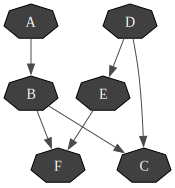

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(beta=1e-10,oneNet=False)
cr.computeBinaryCPTMinMax()
print(cr)


A:Range([0,1])
<> : [[0.354352 , 0.645648] , [0.353416 , 0.646584]]

B:Range([0,1])
<A:0> : [[0.733865 , 0.266135] , [0.733862 , 0.266138]]
<A:1> : [[0.608041 , 0.391959] , [0.608023 , 0.391977]]

C:Range([0,1])
<B:0|D:0> : [[0.342921 , 0.657079] , [0.0365697 , 0.96343]]
<B:1|D:0> : [[0.443762 , 0.556238] , [0.443549 , 0.556451]]
<B:0|D:1> : [[0.304532 , 0.695468] , [0.302275 , 0.697725]]
<B:1|D:1> : [[0.418956 , 0.581044] , [0.418639 , 0.581361]]

D:Range([0,1])
<> : [[0.42319 , 0.57681] , [0.422894 , 0.577106]]

E:Range([0,1])
<D:0> : [[0.671332 , 0.328668] , [0.671325 , 0.328675]]
<D:1> : [[0.284042 , 0.715958] , [0.280743 , 0.719257]]

F:Range([0,1])
<E:0|B:0> : [[0.597341 , 0.402659] , [0.59732 , 0.40268]]
<E:1|B:0> : [[0.745908 , 0.254092] , [0.745905 , 0.254095]]
<E:0|B:1> : [[0.220628 , 0.779372] , [0.0743188 , 0.925681]]
<E:1|B:1> : [[0.300562 , 0.699438] , [0.298134 , 0.701866]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [5]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [6]:
for eps in [1,1e-3,1e-5,1e-8,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()